In [1]:
# importing required libraries
import numpy as np
from operator import index, length_hint
from re import I
import matplotlib.pyplot as plt
import matplotlib.image as img
from PIL import Image
import numpy as np
from scipy import signal
import cv2
from google.colab.patches import cv2_imshow


In [2]:
def Convolution(image,kernal):
            pixel_value=0
            image_array = np.array(image)
            rows, columns = image_array.shape
            Krows,kcolumns=kernal.shape
            new_image=np.ones([rows-(Krows-1), columns-(kcolumns-1)],dtype=np.float32)
    # For Moving Window
            for i in range(rows-( Krows-1)):
                for j in range(columns-(kcolumns-1)):
                   V_index=0
                   U_index=0
# For convolving with kernals depening on their selected size
                   for rp in range (i,i+ Krows):
                        for cp in range (j,j+kcolumns):
                            pixel_value=pixel_value+image_array[rp][cp]*kernal[U_index][V_index]
                            V_index+=1
                        V_index=0
                        U_index+=1
                   U_index=0
                   new_image[i][j]=pixel_value
                   pixel_value=0
            print(new_image)
            return new_image

In [3]:
X_kernel = (np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]]))

Y_kernel = (np.array([[-1,-2,-1],
                    [0,0,0],
                    [1,2,1]]))
XY_kernel = (np.array([[-2,-2, 0],
                    [-2, 0, 2],
                    [0, 0, 2]]))

outline = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]])

In [4]:
def Sobel_X(img: np.array) -> np.array:
    imgx = Convolution(img, X_kernel)
    return imgx

In [5]:
def Sobel_Y(img: np.array) -> np.array:
    imgy = Convolution(img, Y_kernel)
    return imgy

In [6]:
def Sobel_XY(img: np.array) -> np.array:
    imgx = Convolution(img, X_kernel)
    imgxy = Convolution(imgx, Y_kernel)
    return imgxy

In [13]:
roberts_cross_v = np.array([[-1, 0],[0, 1]])
roberts_cross_h = np.array([[0, -1],[1, 0]])

In [26]:
def Robert_Mask(img: np.array) -> np.array:
    vertical = Convolution(img, roberts_cross_v)
    horizontal = Convolution(img, roberts_cross_h)
    robert_img = np.sqrt(np.square(horizontal) + np.square(vertical))
    cv2.imwrite('robert_img.jpg', robert_img)

In [19]:
def Prewitt_Mask(img: np.array):

    pre_x = Convolution(img, Hx) / 6.0
    pre_y = Convolution(img, Hy) / 6.0
    #calculate the gradient magnitude of vectors
    pre_out = np.sqrt(np.power(pre_x, 2) + np.power(pre_y, 2))
    # mapping values from 0 to 255
    pre_out = (pre_out / np.max(pre_out)) * 255
    cv2.imwrite('prewitt_image.jpg', pre_out)

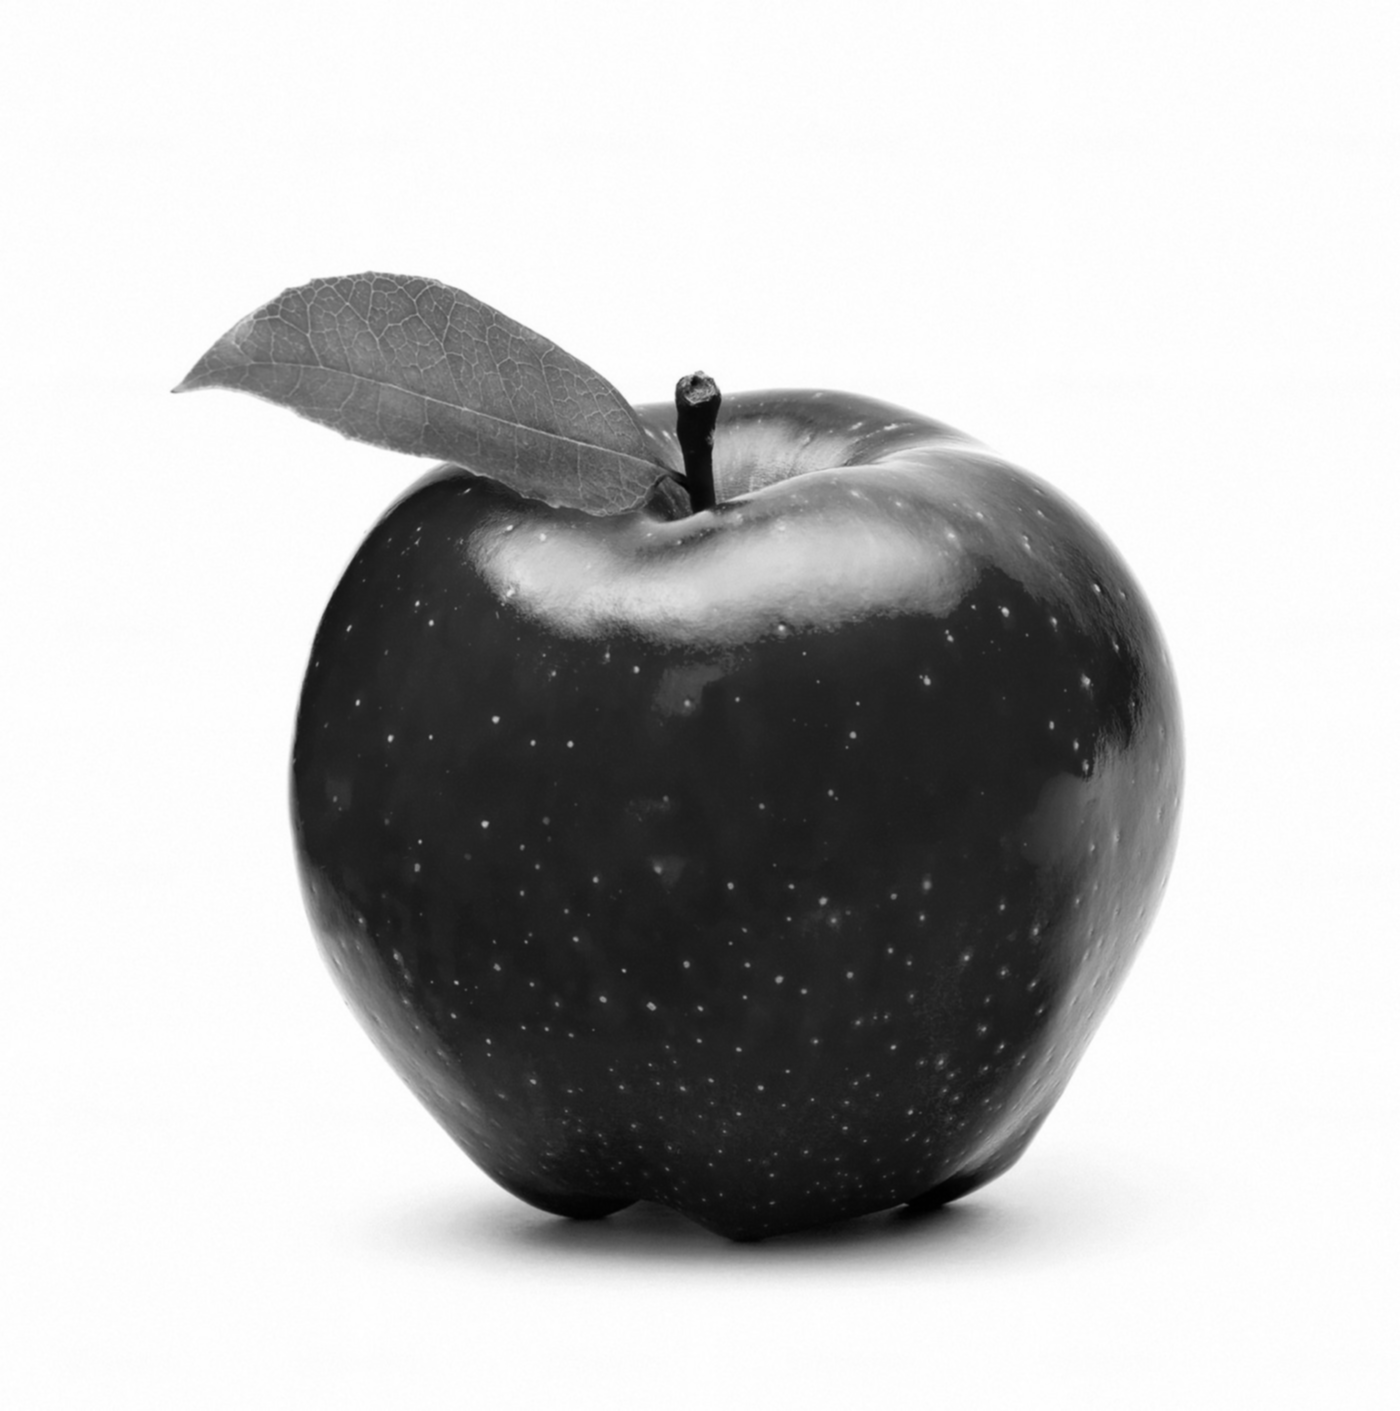

In [11]:
img_1= cv2.imread('/content/apple.jpeg')
img_2=cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY) #flage=0 for gray scale
img_3= cv2.GaussianBlur(img_2, (3,3), 0)
cv2_imshow(img_3)

[[-3.  1.  7. ... -1. -1. -1.]
 [-2.  1.  5. ...  1. -1. -3.]
 [-2.  3.  3. ...  3. -4. -6.]
 ...
 [-4. -1.  2. ...  0.  2.  3.]
 [-1.  0.  3. ...  1.  2.  1.]
 [ 0.  0.  4. ...  2.  3.  1.]]


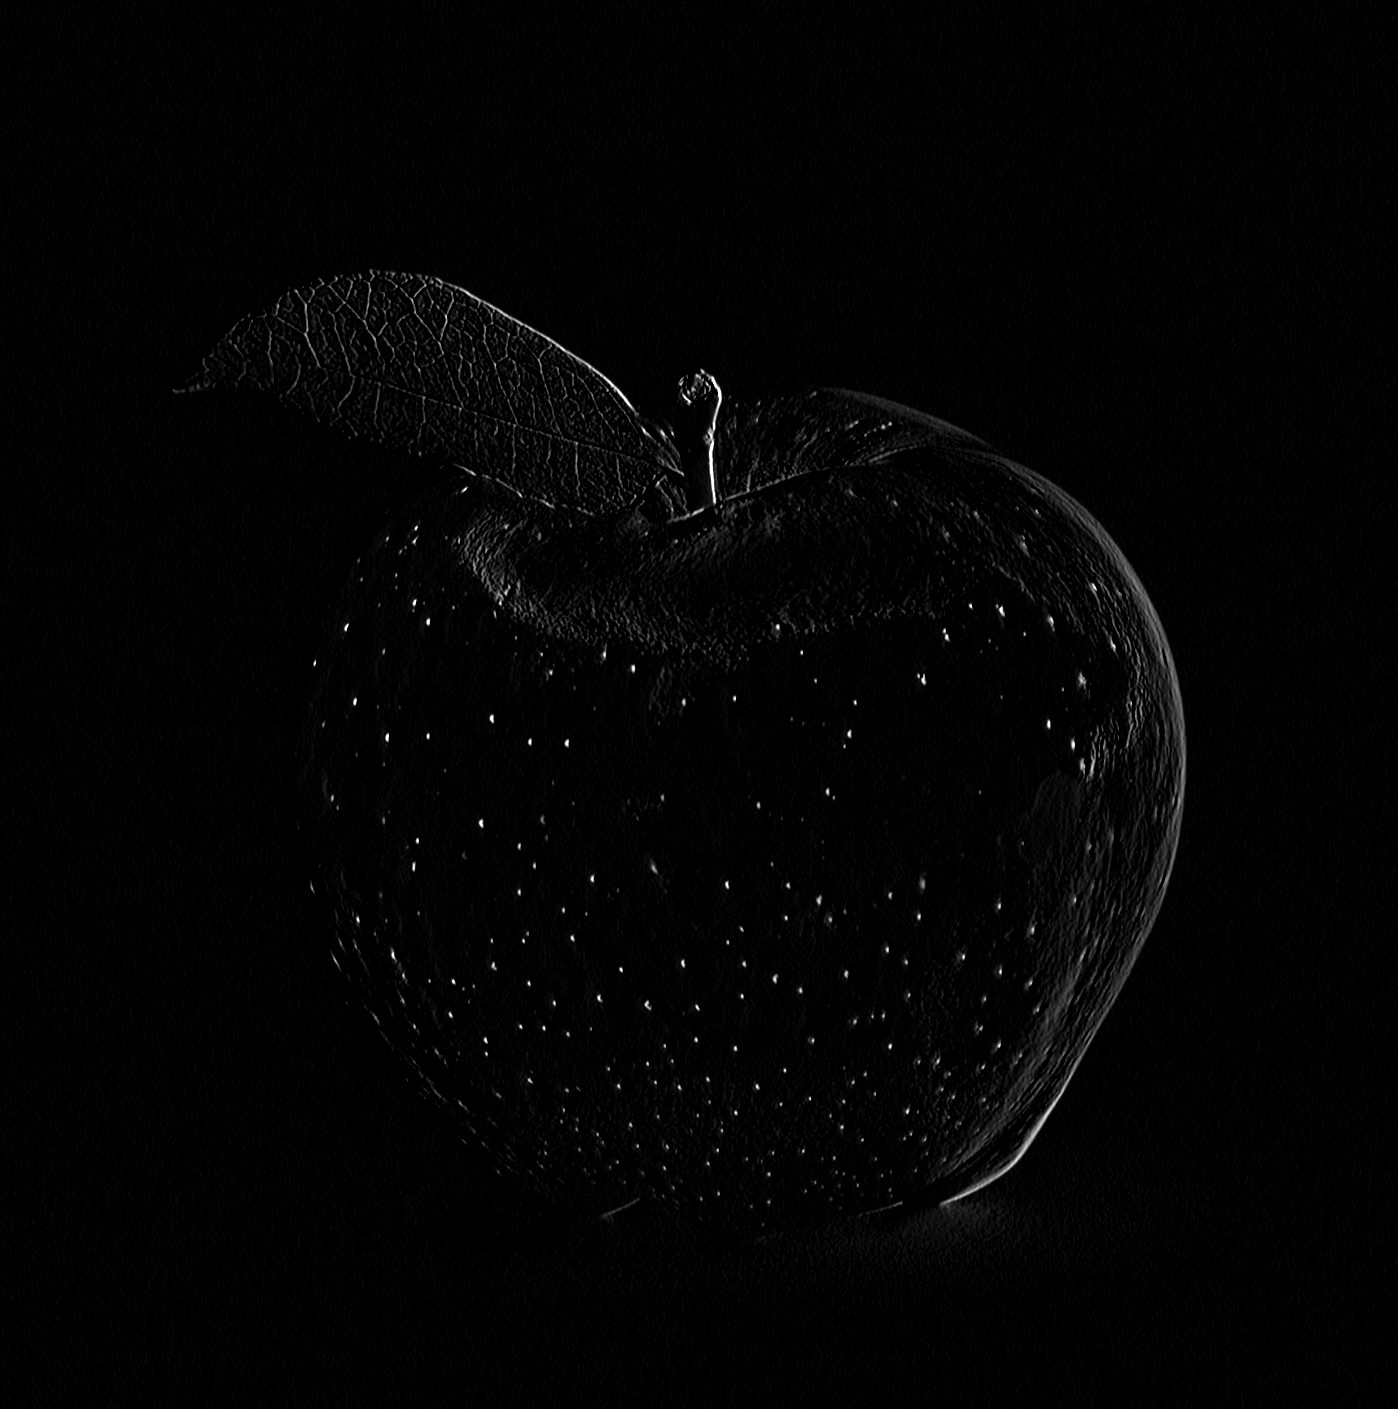

In [12]:
SobelX=Sobel_X(img_3)
cv2_imshow(SobelX)

[[ 3.  3.  1. ... -3. -1. -1.]
 [ 2.  3.  3. ... -1. -1. -3.]
 [ 4.  5.  5. ...  3.  2. -2.]
 ...
 [ 0.  3.  4. ...  0.  0. -1.]
 [-1.  0.  1. ...  5.  6.  5.]
 [ 0.  0.  0. ...  0.  1.  3.]]


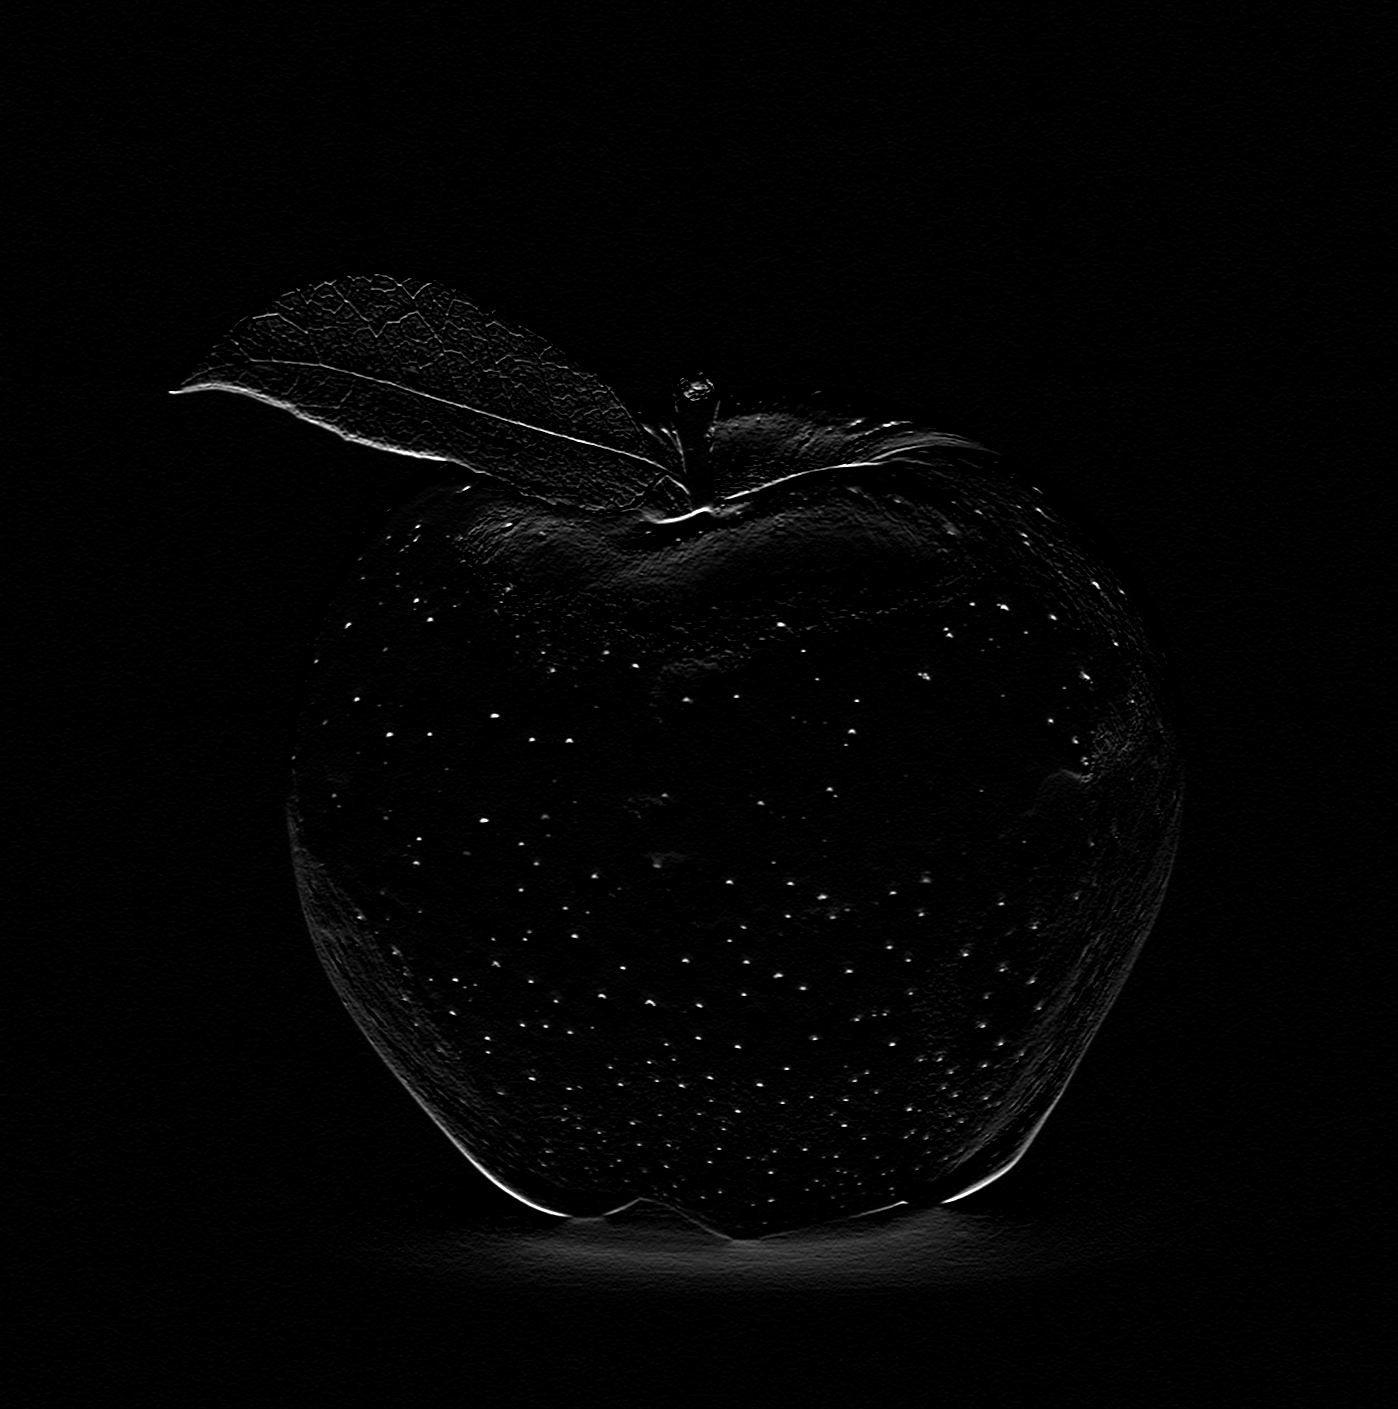

In [ ]:
SobelY=Sobel_Y(img_3)
cv2_imshow(SobelY)

[[-3.  1.  7. ... -1. -1. -1.]
 [-2.  1.  5. ...  1. -1. -3.]
 [-2.  3.  3. ...  3. -4. -6.]
 ...
 [-4. -1.  2. ...  0.  2.  3.]
 [-1.  0.  3. ...  1.  2.  1.]
 [ 0.  0.  4. ...  2.  3.  1.]]
[[  1. -13. -18. ...   8.   8.  -7.]
 [  4. -11. -19. ...  14.   5. -13.]
 [  1.  -4.  -5. ...  12.   3.  -1.]
 ...
 [  7.  -1.   1. ...   1.   2.   6.]
 [ 12.   3.   1. ...   1.   2.   1.]
 [  8.   5.   2. ...  -2.   3.   2.]]


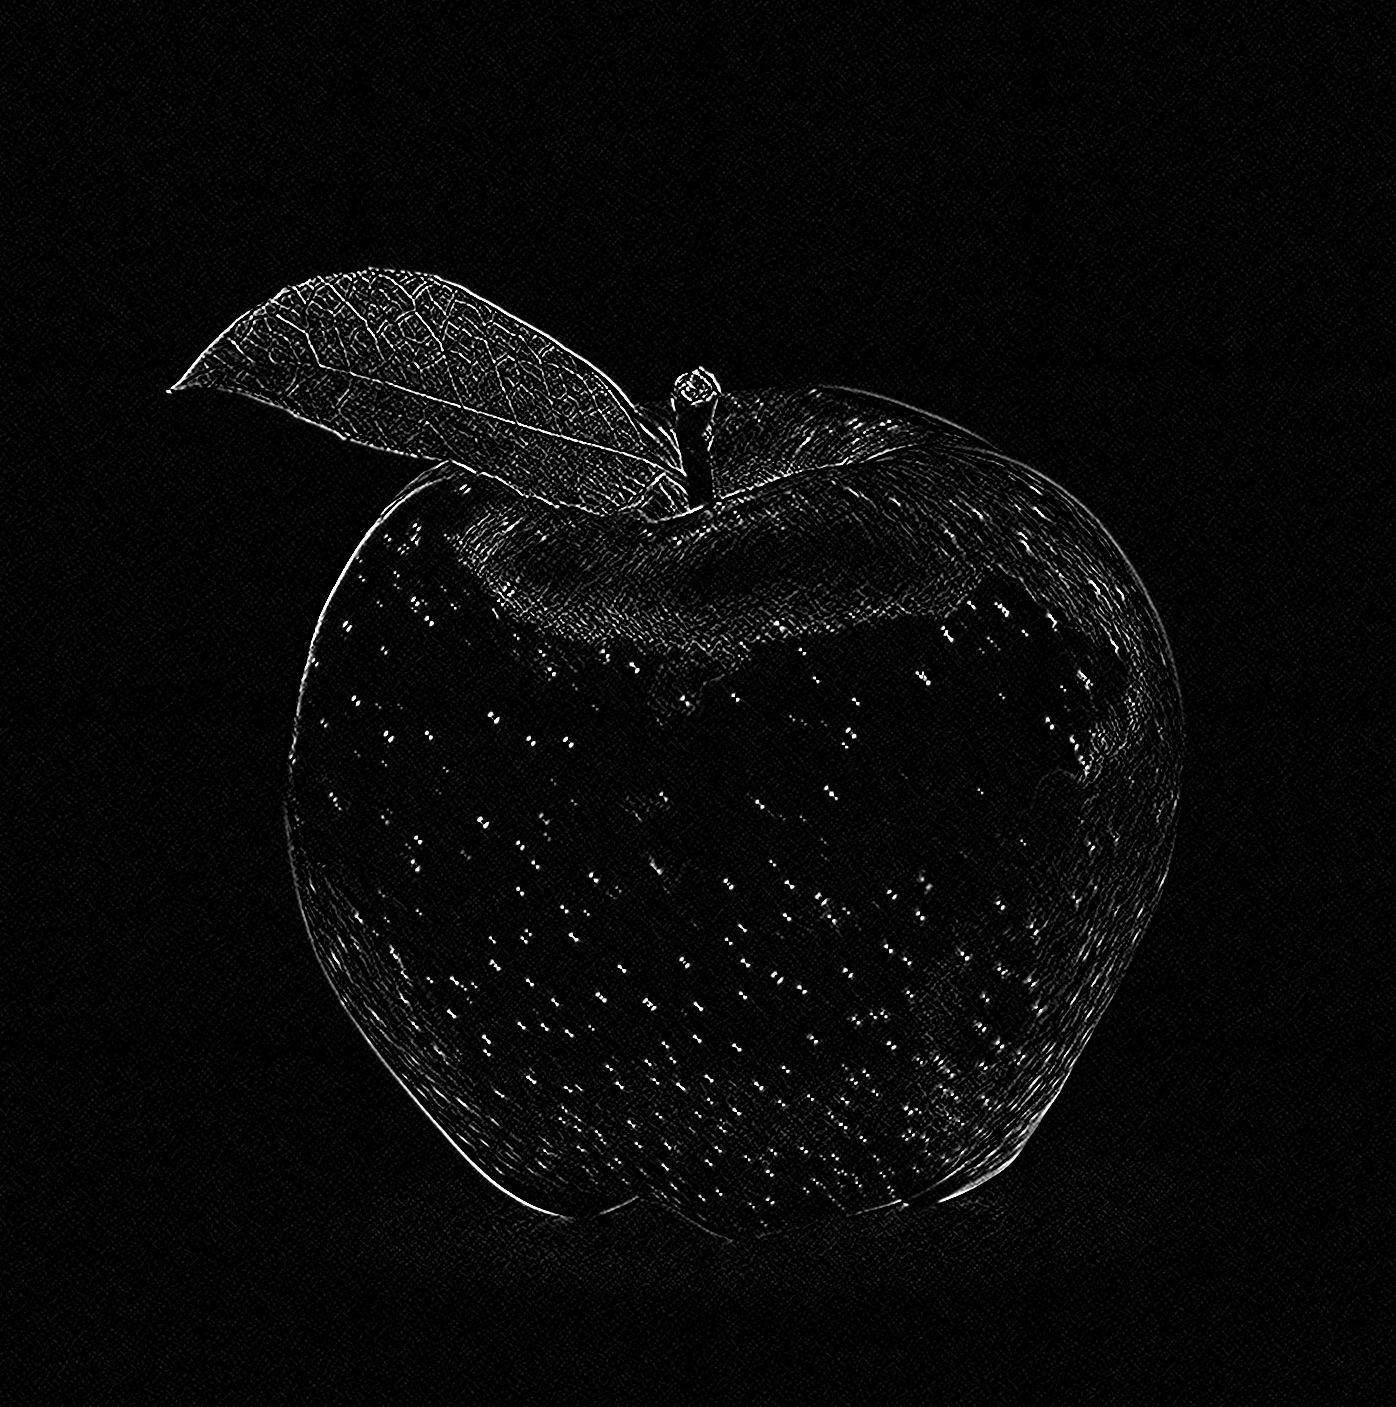

In [ ]:
SobelْXY=Sobel_XY(img_3)
cv2_imshow(SobelْXY)

In [17]:
Hx = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
Hy = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

In [23]:
pre=Prewitt_Mask(img_3)

[[-2.  1.  5. ... -1. -1. -1.]
 [-2.  1.  4. ...  1. -1. -2.]
 [-1.  2.  2. ...  2. -3. -5.]
 ...
 [-3. -1.  2. ...  0.  1.  2.]
 [-1.  0.  2. ...  1.  2.  1.]
 [ 0.  0.  3. ...  1.  2.  1.]]
[[ 2.  2.  1. ... -2. -1. -1.]
 [ 2.  2.  2. ... -1. -1. -2.]
 [ 3.  4.  3. ...  2.  1. -1.]
 ...
 [ 0.  2.  3. ...  0.  0. -1.]
 [-1.  0.  1. ...  4.  4.  4.]
 [ 0.  0.  0. ...  0.  1.  2.]]


In [27]:
robert = Robert_Mask(img_2)

[[-2.  0.  2. ... -1.  0.  0.]
 [-1.  0.  2. ...  0.  0. -1.]
 [-1.  0.  2. ...  1. -1. -2.]
 ...
 [-2. -1.  1. ...  4.  3.  0.]
 [ 0.  0.  0. ...  1.  0. -1.]
 [ 0.  0.  0. ...  0.  0.  0.]]
[[ 2.  1. -1. ...  0.  0.  0.]
 [ 2.  1. -1. ...  0.  0.  0.]
 [ 1.  1. -1. ...  0.  1.  0.]
 ...
 [-1.  1.  1. ...  2.  1.  1.]
 [ 0.  0.  0. ... -1.  0.  1.]
 [ 0.  0.  0. ... -2. -1.  1.]]


In [28]:
def gradient_mag(fx, fy) :
    grad_mag = np.hypot(fx, fy)
    return grad_mag/np.max(grad_mag)

In [29]:
# the closest direction
def closest_dir_function(grad_dir):
    closest_dir_arr = np.zeros(grad_dir.shape)
    for i in range(1, int(grad_dir.shape[0] - 1)):
        for j in range(1, int(grad_dir.shape[1] - 1)):

            if ((grad_dir[i, j] > -22.5 and grad_dir[i, j] <= 22.5) or (
                    grad_dir[i, j] <= -157.5 and grad_dir[i, j] > 157.5)):
                closest_dir_arr[i, j] = 0

            elif ((grad_dir[i, j] > 22.5 and grad_dir[i, j] <= 67.5) or (
                    grad_dir[i, j] <= -112.5 and grad_dir[i, j] > -157.5)):
                closest_dir_arr[i, j] = 45

            elif ((grad_dir[i, j] > 67.5 and grad_dir[i, j] <= 112.5) or (
                    grad_dir[i, j] <= -67.5 and grad_dir[i, j] > -112.5)):
                closest_dir_arr[i, j] = 90

            else:
                closest_dir_arr[i, j] = 135

    return closest_dir_arr

In [30]:
###Canny 


#Convert to thinned edge
def non_maximal_suppressor(grad_mag, closest_dir):
    thinned_output = np.zeros(grad_mag.shape)
    for i in range(1, int(grad_mag.shape[0] - 1)):
        for j in range(1, int(grad_mag.shape[1] - 1)):

            if (closest_dir[i, j] == 0):
                if ((grad_mag[i, j] > grad_mag[i, j + 1]) and (grad_mag[i, j] > grad_mag[i, j - 1])):
                    thinned_output[i, j] = grad_mag[i, j]
                else:
                    thinned_output[i, j] = 0

            elif (closest_dir[i, j] == 45):
                if ((grad_mag[i, j] > grad_mag[i + 1, j + 1]) and (grad_mag[i, j] > grad_mag[i - 1, j - 1])):
                    thinned_output[i, j] = grad_mag[i, j]
                else:
                    thinned_output[i, j] = 0

            elif (closest_dir[i, j] == 90):
                if ((grad_mag[i, j] > grad_mag[i + 1, j]) and (grad_mag[i, j] > grad_mag[i - 1, j])):
                    thinned_output[i, j] = grad_mag[i, j]
                else:
                    thinned_output[i, j] = 0

            else:
                if ((grad_mag[i, j] > grad_mag[i + 1, j - 1]) and (grad_mag[i, j] > grad_mag[i - 1, j + 1])):
                    thinned_output[i, j] = grad_mag[i, j]
                else:
                    thinned_output[i, j] = 0

    return thinned_output / np.max(thinned_output)

In [31]:
#Function to include weak pixels that are connected to chain of strong pixels
def DFS(img) :
    for i in range(1, int(img.shape[0] - 1)) :
        for j in range(1, int(img.shape[1] - 1)) :
            if(img[i, j] == 1) :
                t_max = max(img[i-1, j-1], img[i-1, j], img[i-1, j+1], img[i, j-1],
                            img[i, j+1], img[i+1, j-1], img[i+1, j], img[i+1, j+1])
                if(t_max == 2) :
                    img[i, j] = 2

In [47]:
#Hysteresis Thresholding
def hysteresis_thresholding(img):
    low_ratio = 0.10
    high_ratio = 0.30
    diff = np.max(img) - np.min(img)
    t_low = np.min(img) + low_ratio * diff
    t_high = np.min(img) + high_ratio * diff

    temp_img = np.copy(img)
    for i in range(1, int(img.shape[0] - 1)):
        for j in range(1, int(img.shape[1] - 1)):
            # Strong pixels
            if (img[i, j] > t_high):
                temp_img[i, j] = 2
            # Weak pixels
            elif (img[i, j] < t_low):
                temp_img[i, j] = 0
            # Intermediate pixels
            else:
                temp_img[i, j] = 1
        total_strong = np.sum(temp_img == 2)

        while (1):
          DFS(temp_img)
          if (total_strong == np.sum(temp_img == 2)):
              break

          total_strong = np.sum(temp_img == 2)
          
     # Remove weak pixels
        for i in range(1, int(temp_img.shape[0] - 1)):
              for j in range(1, int(temp_img.shape[1] - 1)):
                  if (temp_img[i, j] == 1):
                      temp_img[i, j] = 0

        temp_img = temp_img / np.max(temp_img)
        return temp_img

    N_img=cv2.imread('/content/lena_gray.png')
    G_img=cv2.cvtColor(N_img, cv2.COLOR_BGR2GRAY) #flage=0 for gray scale
    B_img= cv2.GaussianBlur(G_img, (3,3), 0)



In [48]:
def Canny_Mask(img: np.array):
        #Find gradient Fx
        x_grad = Convolution(img,X_kernel)
        # Find gradient Fy
        y_grad = Convolution(img,Y_kernel)
        # Compute edge strength
        grad_mag = gradient_mag(x_grad, y_grad)
        # Compute direction of gradient
        grad_dir = np.degrees(np.arctan2(y_grad, x_grad))
        # Phase 2 : Non maximal suppression
        closest_dir = closest_dir_function(grad_dir)
        thinned_output = non_maximal_suppressor(grad_mag, closest_dir)
        # # Phase 3 : Hysteresis Thresholding
        output_img = hysteresis_thresholding(thinned_output)
        cv2.imwrite('canny.jpg', output_img)
        return output_img

In [49]:
img_1c= cv2.imread('/content/lena_gray.png')
img_2c=cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY) #flage=0 for gray scale
img_3c= cv2.GaussianBlur(img_2, (3,3), 0)
cannny=Canny_Mask(img_3c)

[[-3.  1.  7. ... -1. -1. -1.]
 [-2.  1.  5. ...  1. -1. -3.]
 [-2.  3.  3. ...  3. -4. -6.]
 ...
 [-4. -1.  2. ...  0.  2.  3.]
 [-1.  0.  3. ...  1.  2.  1.]
 [ 0.  0.  4. ...  2.  3.  1.]]
[[ 3.  3.  1. ... -3. -1. -1.]
 [ 2.  3.  3. ... -1. -1. -3.]
 [ 4.  5.  5. ...  3.  2. -2.]
 ...
 [ 0.  3.  4. ...  0.  0. -1.]
 [-1.  0.  1. ...  5.  6.  5.]
 [ 0.  0.  0. ...  0.  1.  3.]]
